# Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn import datasets
import statsmodels.api as sm

import scikitplot as skplt

In [2]:
df = pd.read_csv("Data/data.csv")
column_names = list(df.columns)
df.drop("num", axis=1, inplace=True)
df.Generation = df.Generation.astype(object)

# EDA

In [12]:
df.groupby(by = ["Generation", "Legendary"],
          axis = 0,
          as_index = False).HP.mean()

,Generation,Legendary,HP
0,1,False,64.612500
1,1,True,98.000000
2,2,False,69.613861
3,2,True,103.400000
4,3,False,64.626761
5,3,True,81.666667
6,4,False,69.740741
7,4,True,100.846154
8,5,False,69.353333
9,5,True,96.133333


In [13]:
df.groupby(by = ["Generation"],
          axis = 0).agg({"Attack": ["min", "mean", "max"],
                           "Defense": ["min", "mean", "max"]})

Defense                 Attack                
               min       mean  max    min       mean  max
Generation                                               
1                5  70.861446  180      5  76.638554  190
2               10  73.386792  230     10  72.028302  185
3               20  74.100000  230     15  81.625000  180
4                5  78.132231  168      5  82.867769  170
5               30  72.327273  145     25  82.066667  170
6               33  76.682927  184     22  75.804878  160

In [17]:
df["num_types"] = np.where(df["Type 2"].notnull(), 2, 1)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,num_types
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,2
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,2
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,2
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,2
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1


# Probability 

## distributions

### Binomial

In [46]:
np.random.seed(42)

(array([503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 497.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

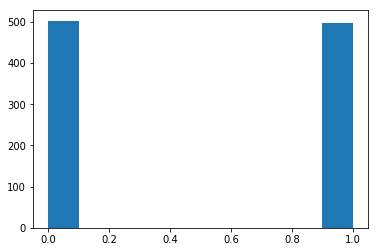

In [24]:
from scipy.stats import bernoulli

exp = bernoulli.rvs(p = 0.5, size=1000, random_state = 42)

plt.hist(exp)

(array([  16.,   85.,  451., 1215., 2055., 2509., 2021., 1121.,  436.,
          91.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

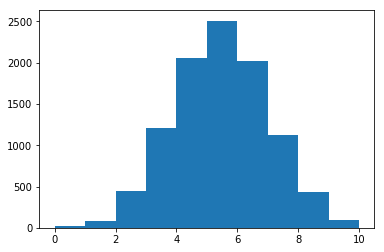

In [47]:
from scipy.stats import binom

exp = binom.rvs(n=10, p=0.5, size=10000, random_state = 42)

plt.hist(exp)

In [38]:
print("Probability of having {} heads out of {} trials = {:.2f}".format(3,10, binom.pmf(k=3, n=10, p=0.5))) # probability mass function
print("Probability of having <= {} heads out of {} trials = {:.2f}".format(3,10, binom.cdf(k=3, n=10, p=0.5))) # cumulative distribution function
print("Probability of having > {} heads out of {} trials = {:.2f}".format(5,10, binom.sf(k=5, n=10, p=0.5))) # survival function

Probability of having 3 heads out of 10 trials = 0.12
Probability of having <= 3 heads out of 10 trials = 0.17
Probability of having > 5 heads out of 10 trials = 0.38


In [42]:
from scipy.stats import describe

describe(exp).mean
describe(exp).variance

0.2502412412412412

In [43]:
binom.stats(n=10, p=0.5)

(array(5.), array(2.5))

### Normal

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


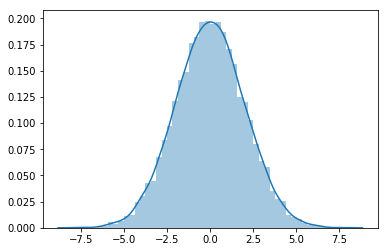

In [68]:
from scipy.stats import norm

sample = norm.rvs(loc = 0, scale = 2, size = 10000, random_state = 42)
sns.distplot(sample)

In [21]:
print("For N(0,1)")
print("probability < 0.5 = {:.2f}".format(norm.cdf(4, mu=2)))
print("probability > 0.5 = {:.2f}".format(norm.sf(4, mu=2)))
print("probability = 0.5 = {:.2f}".format(norm.ppf(4, mu=2)))
print("interval containing {:.1%} of the data = {}".format(0.7, norm.interval(0.68)))

For N(0,1)


NameError: name 'norm' is not defined

### Poisson

* discrete
* counts of events in a time or space interval

<BarContainer object of 10 artists>

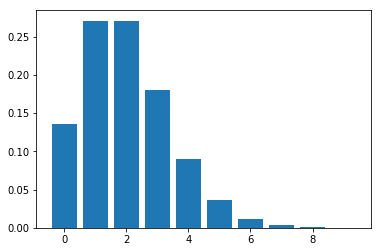

In [18]:
from scipy.stats import poisson

distribution = []
for k in range(10):
    distribution.append(poisson.pmf(k = k, mu=2))
    
plt.bar(x = range(10), height = distribution)

<BarContainer object of 10 artists>

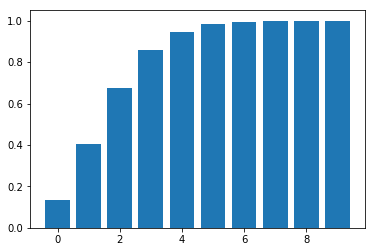

In [19]:
from scipy.stats import poisson

distribution = []
for k in range(10):
    distribution.append(poisson.cdf(k = k, mu=2))
    
plt.bar(x = range(10), height = distribution)

In [34]:
print("For mu = 2")
print("probability < 4 = {:.2f}".format(poisson.cdf(4, mu=2)))
print("probability > 4 = {:.2f}".format(poisson.sf(4, mu=2)))
print("probability = 4 = {:.2f}".format(poisson.pmf(4, mu=2)))

For mu = 2
probability < 4 = 0.95
probability > 4 = 0.05
probability = 4 = 0.09


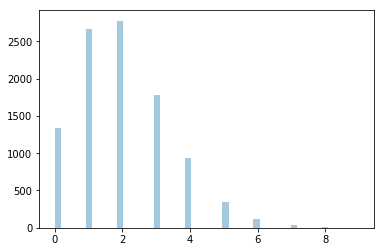

In [27]:
samples = poisson.rvs(mu = 2, size=10000, random_state = 42)
sns.distplot(samples, kde=False)

### Geometric

* probability of first success after n trials

In [42]:
from scipy.stats import geom

print("For p = 0.3")
print("probability of success in less than 4 attempts = {:.2f}".format(geom.cdf(4, p=0.3)))
print("probability of success in more than 4 attempts = {:.2f}".format(geom.sf(4, p=0.3)))
print("probability of success after 3 failures = {:.2f}".format(geom.pmf(4, p=0.3)))
print("Number of attempts to have a probability of success of 0.9 = {:.2f}".format(geom.ppf(0.9, p=0.3)))

For p = 0.3
probability of success in less than 4 attempts = 0.76
probability of success in more than 4 attempts = 0.24
probability of success after 3 failures = 0.10
Number of attempts to have a probability of success of 0.9 = 7.00


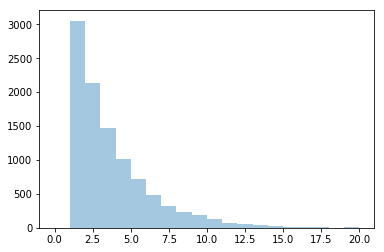

In [38]:
samples = geom.rvs(p=0.3, size=10000, random_state = 42)
sns.distplot(samples, bins = np.linspace(0,20,21), kde=False)

## Experiments

In [58]:
from scipy.stats import find_repeats

sample = binom.rvs(n=2,p=0.5, size = 10, random_state = 42)
print("Sample = {}".format(sample))
print("Counts of outcomes = {}".format(find_repeats(sample).counts)) # count how many times you have each outcome

Sample = [1 2 1 1 0 0 0 2 1 1]
Counts of outcomes = [3 5 2]


In [64]:
from scipy.stats import relfreq

print("probability of each outcome = {}".format(relfreq(binom.rvs(n=2,p=0.2, size = 1000, random_state = 42), numbins = 3).frequency)) # probability of 2 

probability of each outcome = [0.659 0.303 0.038]


## Law of large number & CLT

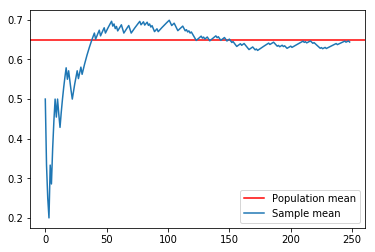

In [51]:
from scipy.stats import binom, describe

samples = binom.rvs(n=1, p=0.65, size=250, random_state = 4)
averages = []
for i in range(2, 251):
    averages.append(describe(samples[0:i]).mean)
    
plt.axhline(binom.mean(n=1, p=0.65), color='red')
plt.plot(averages, '-')

plt.legend(("Population mean","Sample mean"), loc='lower right')

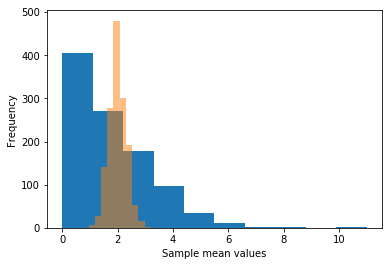

In [55]:
from scipy.stats import poisson

population = poisson.rvs(mu = 2, size=1000, random_state = 20)
plt.hist(population)


sample_means = []
for _ in range(1500):

    sample = np.random.choice(population, 20)
    sample_means.append(describe(sample).mean)

plt.hist(sample_means, alpha=0.5)
plt.xlabel("Sample mean values")
plt.ylabel("Frequency")
plt.show()

# Stats

## Parametric tests

### T test

In [17]:
from scipy import stats

# 1 sample t test
res =stats.ttest_1samp(df.Attack, 70)
print("pvalue = {}".format(res[1]))

pvalue = 1.3980610122763659e-14


In [5]:
# 2 samples t test

res = stats.ttest_ind(df[df.Legendary]["Total"], df[~df.Legendary]["Total"])
print("pvalue = {}".format(res[1]))

pvalue = 3.0952457469652825e-52


In [9]:
# paired t test

res = stats.ttest_rel(df["Defense"], df["Attack"])
print("pvalue = {}".format(res[1]))

pvalue = 1.7140303479358558e-05


In [30]:
# multiple ttest

t_result_1v2= stats.ttest_ind(df[df.Generation == 1].Total, df[df.Generation == 2].Total)
t_result_1v3= stats.ttest_ind(df[df.Generation == 1].Total, df[df.Generation == 3].Total)
t_result_2v3= stats.ttest_ind(df[df.Generation == 2].Total, df[df.Generation == 3].Total)

pvals_array = [t_result_1v2[1], t_result_1v3[1], t_result_2v3[1]]
print(pvals_array)

# Perform Bonferroni correction
adjustedvalues = sm.stats.multitest.multipletests(pvals_array, alpha=0.05, method="b")
print(adjustedvalues)

[0.55991406490144402, 0.50173627395639475, 0.27186073756153178]
(array([False, False, False], dtype=bool), array([ 1.        ,  1.        ,  0.81558221]), 0.016952427508441503, 0.016666666666666666)


### testing proportion (chi-square, Fisher exact)

* Fisher is to chi-square what two sample t test is to simple t test

In [16]:
legend = df["Generation"].value_counts()

stats.chisquare(legend)

Power_divergenceResult(statistic=47.364999999999995, pvalue=4.7866570174121113e-09)

In [30]:
table = pd.crosstab(df[df.Generation.isin([1,3])].Generation, df.Legendary)
display(table)
stats.fisher_exact(table, alternative="two-sided")

Legendary,False,True
Generation,,
1,160,6
3,142,18


(3.380281690140845, 0.010174685927981623)

### correlation test

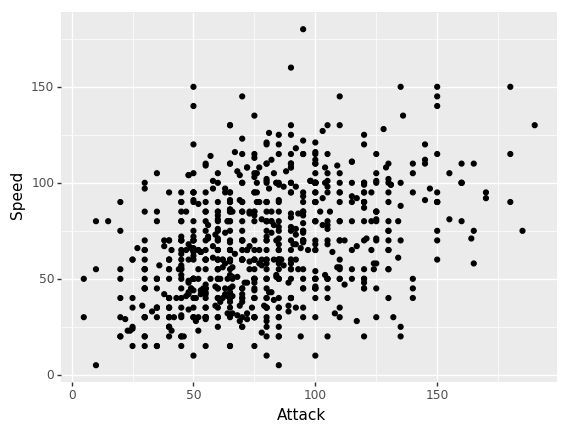

<ggplot: (-9223363254418097229)>
(0.38123973924108973, 4.4799033780532703e-29)


In [34]:
import plotnine as p9
print(p9.ggplot(df) + p9.aes(x="Attack", y="Speed") + p9.geom_point())

pearson = stats.pearsonr(df.Attack, df.Speed)
print(pearson)

### ANOVA

In [13]:
gen1 = df[df.Generation == 1].HP
gen2 = df[df.Generation == 2].HP
gen3 = df[df.Generation == 3].HP

stats.f_oneway(gen1, gen2, gen3)

F_onewayResult(statistic=1.3820785268048337, pvalue=0.25217171431194962)

In [26]:
import statsmodels as sm

formula = 'HP ~ Generation * Legendary' #HP ~ Generation + Legendary + Generation:Legendary
model = sm.formula.api.ols(formula, data=df).fit()

aov_table = sm.api.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Generation,5912.184969,5.0,1.966967,8.133154e-02
Legendary,38464.613952,1.0,63.985332,4.469561e-15
Generation:Legendary,2343.813975,5.0,0.779780,5.643852e-01
Residual,473704.124970,788.0,NaN,NaN


### Normality tests

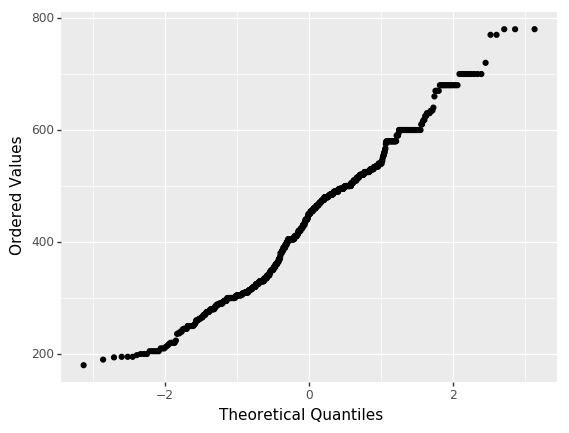

<ggplot: (-9223363304045841257)>


In [33]:
from scipy import stats
import plotnine as p9

tq = stats.probplot(df.Total, dist="norm")

tqdf = pd.DataFrame(data= {'Theoretical Quantiles': tq[0][0], 
                         "Ordered Values": df.Total.sort_values() })
# Create Q-Q plot
print(p9.ggplot(tqdf)+ p9.aes("Theoretical Quantiles", "Ordered Values") +p9.geom_point())

In [35]:
# Shapiro-Wilk
# H0: data is normally distributed
# for small sample size. When sample size is large, usually no need to check for normality

stats.shapiro(df.Total)

(0.9817469120025635, 1.932413695726609e-08)

## Non parametric tests

### Wilcoxon sum rank test - Mann-whitney U test

In [36]:
res = stats.ranksums(df[df.Legendary]["Total"], df[~df.Legendary]["Total"])
res

RanksumsResult(statistic=12.54471531401145, pvalue=4.2493873394270626e-36)

In [ ]:
# Wilcoxon signed rank test - equivelent to paired t test
stats.wilcoxon()

### Spearman correlation

In [37]:
stats.spearmanr(df.Total, df.Attack)

SpearmanrResult(correlation=0.7201309606515206, pvalue=8.2588609523935911e-129)

## Sample size, alpha, power and effect size

In [14]:
from statsmodels.stats import power as pwr

# Set parameters
effect = 0.4
power = 0.8
alpha = 0.05

# Calculate ratio
gen1 = float(len(df[df.Generation == 1]))
gen2 = float(len(df[df.Generation == 2]))
ratio = gen1/gen2

# Initialize analysis and calculate sample size
analysis = pwr.TTestIndPower()
ssresult = analysis.solve_power(effect_size=effect, power=power, alpha= alpha, nobs1=None, ratio=ratio)
print(ssresult)

81.13524297426882


In [27]:
effect = 0.5
sample_size = len(df[df.Generation == 1])
alpha = 0.05

# Calculate ratio
gen1 = float(len(df[df.Generation == 1]))
gen2 = float(len(df[df.Generation == 2]))
ratio = gen1/gen2

# Initialize analysis and calculate sample size
analysis = pwr.TTestIndPower()
ssresult = analysis.solve_power(effect_size=effect, power=None, alpha= alpha, nobs1=sample_size, ratio=ratio)
print("Power = {:.3f}".format(ssresult))

Power = 0.999


cohen'd = normalized difference between the means (way to asses effect size between continuous and categorical variable
odds ratio = how much one event is associated with the other (for categorical vars)

2.53294840577


0.3599791820339769

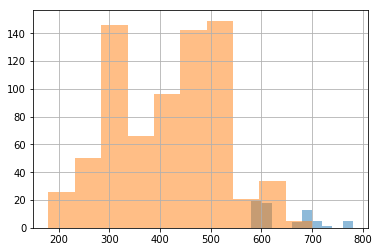

In [15]:
import math

sampleA = df[df.Legendary].Total
sampleB = df[~df.Legendary].Total

pooled_sd = math.sqrt((sampleA.std()**2 + sampleB.std()**2)/2)
cohensd = abs(sampleA.mean() - sampleB.mean()) / pooled_sd
print(cohensd)
sampleA.hist(alpha=0.5)
sampleB.hist(alpha=0.5)

analysis.solve_power(effect_size=None, power=power, alpha= alpha, nobs1=100, ratio=ratio)

In [23]:
# Create a table of cross-tabulations
table = pd.crosstab(df.Legendary, df[df.Generation.isin([1,6])].Generation)
print(table)

# Perform the Fisher exact test
chi = stats.fisher_exact(table, alternative="two-sided")

# Print p-value
print("p-value of test: " + str(round(chi[1], 5))  )

# Print odds ratio  
print("Odds ratio between groups: " + str(round(chi[0], 1))  )

Generation    1   6
Legendary          
False       160  74
True          6   8
p-value of test: 0.07541
Odds ratio between groups: 2.9


## GLM

In [3]:
from statsmodels.formula.api import ols, glm

In [40]:
formula = 'Total ~ Attack + Attack:Defense + C(Generation)' # include interaction and specify categorical variables

family_LM = sm.families.Gaussian()
family_GLM = sm.families.Poisson()

model_LM = glm(formula = formula, data = df, family = family_LM).fit()
print(model_LM.summary())

model_GLM = glm(formula = formula, data = df, family = family_GLM).fit()
print(model_GLM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                  800
Model:                            GLM   Df Residuals:                      792
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                          5618.6
Method:                          IRLS   Log-Likelihood:                -4584.7
Date:                Mon, 10 Feb 2020   Deviance:                   4.4499e+06
Time:                        17:11:46   Pearson chi2:                 4.45e+06
No. Iterations:                     3   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            357.4910      8.711     41.037      0.000     340.417     374.565
C(Generation)[T.2]    -3.345

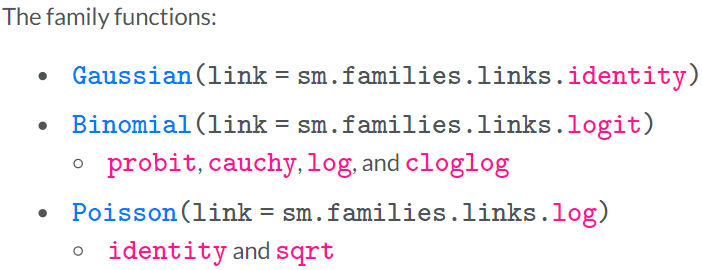

In [4]:
formula = 'Legendary ~ Total*HP'

family_GLM = sm.families.Binomial(link = sm.families.links.probit)

model_GLM = glm(formula = formula, data = df, family = family_GLM).fit()
# print(model_GLM.summary())
print(model_GLM.params)
print(model_GLM.conf_int(alpha=0.9))

Intercept    13.023260
Total        -0.021349
HP           -0.019516
Total:HP      0.000036
dtype: float64
                   0          1
Intercept  12.527414  13.519107
Total      -0.022213  -0.020485
HP         -0.024658  -0.014374
Total:HP    0.000027   0.000045


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


### Formula with patsy

In [64]:
from patsy import dmatrix # is called by glm function to create intermediate df

display(dmatrix('Attack + Defense + C(Generation)', data = df, return_type = 'dataframe').head())

display(dmatrix('I(Attack+Defense)', data = df, return_type = 'dataframe').head())

display(dmatrix('np.log(Total)', data = df, return_type = 'dataframe').head())

display(dmatrix('Attack:Defense', data = df, return_type = 'dataframe').head())

display(dmatrix('Attack*Defense', data = df, return_type = 'dataframe').head())

,Intercept,C(Generation)[T.2],C(Generation)[T.3],C(Generation)[T.4],C(Generation)[T.5],C(Generation)[T.6],Attack,Defense
0,1.0,0.0,0.0,0.0,0.0,0.0,49.0,49.0
1,1.0,0.0,0.0,0.0,0.0,0.0,62.0,63.0
2,1.0,0.0,0.0,0.0,0.0,0.0,82.0,83.0
3,1.0,0.0,0.0,0.0,0.0,0.0,100.0,123.0
4,1.0,0.0,0.0,0.0,0.0,0.0,52.0,43.0


,Intercept,I(Attack + Defense)
0,1.0,98.0
1,1.0,125.0
2,1.0,165.0
3,1.0,223.0
4,1.0,95.0


,Intercept,np.log(Total)
0,1.0,5.762051
1,1.0,6.003887
2,1.0,6.263398
3,1.0,6.437752
4,1.0,5.733341


,Intercept,Attack:Defense
0,1.0,2401.0
1,1.0,3906.0
2,1.0,6806.0
3,1.0,12300.0
4,1.0,2236.0


,Intercept,Attack,Defense,Attack:Defense
0,1.0,49.0,49.0,2401.0
1,1.0,62.0,63.0,3906.0
2,1.0,82.0,83.0,6806.0
3,1.0,100.0,123.0,12300.0
4,1.0,52.0,43.0,2236.0


### Transformations

In [53]:
glm("Legendary ~ standardize(Attack) + np.log(Total) + center(HP) + C(Generation)", 
    data=df, 
    family = sm.families.Binomial())\
    .fit()\
    .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Generalized Linear Model Regression Results                            
===================================================================================================
Dep. Variable:     ['Legendary[False]', 'Legendary[True]']   No. Observations:                  800
Model:                                                 GLM   Df Residuals:                      791
Model Family:                                     Binomial   Df Model:                            8
Link Function:                                       logit   Scale:                          1.0000
Method:                                               IRLS   Log-Likelihood:                -81.290
Date:                                     Mon, 10 Feb 2020   Deviance:                       162.58
Time:                                             17:14:39   Pearson chi2:                     184.
No. Iterations:                                          9   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             166.1175     21.515      7.721      0.000     123.948     208.287
C(Generation)[T.2]     -0.8692      0.903     -0.963      0.335      -2.638       0.900
C(Generation)[T.3]     -1.3224      0.739     -1.789      0.074      -2.771       0.126
C(Generation)[T.4]     -1.6272      0.767     -2.122      0.034      -3.130      -0.125
C(Generation)[T.5]     -2.3909      0.769     -3.111      0.002      -3.897      -0.885
C(Generation)[T.6]     -2.1419      0.879     -2.436      0.015      -3.865      -0.418
standardize(Attack)     0.7970      0.259      3.083      0.002       0.290       1.304
np.log(Total)         -25.7993      3.375     -7.643      0.000     -32.415     -19.184
center(HP)              0.0102      0.011      0.925      0.355      -0.011       0.032
=======================================================================================
"""

In [55]:
glm("Legendary ~ I(Attack + Defense) + I(HP * Speed)", # to combine columns
    data=df, 
    family = sm.families.Binomial())\
    .fit()\
    .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Generalized Linear Model Regression Results                            
===================================================================================================
Dep. Variable:     ['Legendary[False]', 'Legendary[True]']   No. Observations:                  800
Model:                                                 GLM   Df Residuals:                      797
Model Family:                                     Binomial   Df Model:                            2
Link Function:                                       logit   Scale:                          1.0000
Method:                                               IRLS   Log-Likelihood:                -128.66
Date:                                     Mon, 10 Feb 2020   Deviance:                       257.33
Time:                                             17:15:37   Pearson chi2:                     471.
No. Iterations:                                          7   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.1640      0.963     10.557      0.000       8.277      12.051
I(Attack + Defense)    -0.0216      0.004     -6.144      0.000      -0.028      -0.015
I(HP * Speed)          -0.0005   6.85e-05     -8.011      0.000      -0.001      -0.000
=======================================================================================
"""

In [10]:
df.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

## VIF

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[["Total", "Attack", "HP", "Speed", "Defense", "Sp. Atk", "Generation"]].copy()
X["Intercept"] = 1


vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# View results using print
print(vif)

# VIF > 2.5 indicates colinearity ...
# Here removing Total we get 

    variables        VIF
0       Total  35.456876
1      Attack   3.385251
2          HP   3.719092
3       Speed   4.106130
4     Defense   6.193106
5     Sp. Atk   5.931702
6  Generation   1.007442
7   Intercept  19.025144


In [21]:
X = df[["Attack", "HP", "Speed", "Defense", "Sp. Atk", "Generation"]].copy()
X["Intercept"] = 1


vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# View results using print
print(vif)

    variables        VIF
0      Attack   1.690858
1          HP   1.299188
2       Speed   1.448730
3     Defense   1.309681
4     Sp. Atk   1.501114
5  Generation   1.007434
6   Intercept  18.805825


## Deviance

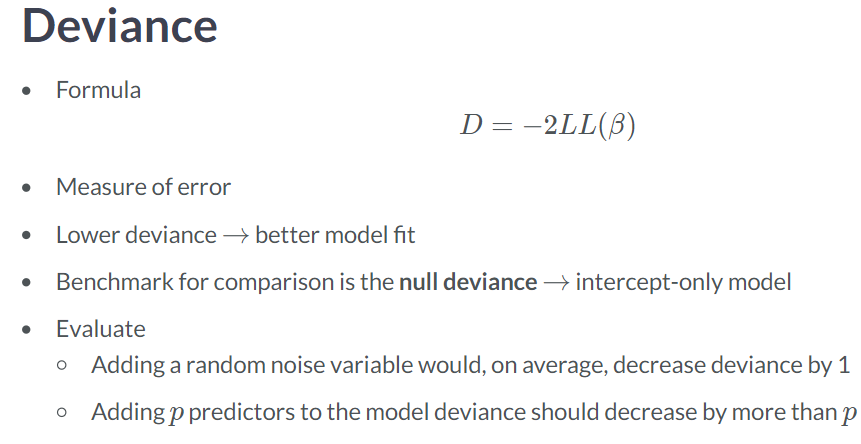

* Deviance will always become smaller when adding new variables
* But we should have a look at each step when we add a new variable and only keep variable that make the Deviance drop by a big amount

In [38]:
family = sm.families.Binomial()

model = glm(formula = 'Legendary ~ Attack' , data = df, family = family).fit()

print("Null model (intercept only) has deviance = {}".format(model.null_deviance))
print("New model has deviance = {}\n".format(model.deviance)) # the lower the better fit but can lead to overfitting

model = glm(formula = 'Legendary ~ Attack + Defense' , data = df, family = family).fit()
print("New model has deviance = {}\n".format(model.deviance)) 

model = glm(formula = 'Legendary ~ HP + Attack + Defense + Speed + C(Generation)' , data = df, family = family).fit()
print("New model has deviance = {}\n".format(model.deviance)) 
print(model.summary())

Null model (intercept only) has deviance = 450.89878533938077
New model has deviance = 362.63348074633365

New model has deviance = 349.99588892160057

New model has deviance = 243.74443184184307

                            Generalized Linear Model Regression Results                            
Dep. Variable:     ['Legendary[False]', 'Legendary[True]']   No. Observations:                  800
Model:                                                 GLM   Df Residuals:                      790
Model Family:                                     Binomial   Df Model:                            9
Link Function:                                       logit   Scale:                          1.0000
Method:                                               IRLS   Log-Likelihood:                -121.87
Date:                                     Mon, 10 Feb 2020   Deviance:                       243.74
Time:                                             17:03:10   Pearson chi2:                     414.
No.

## A/B testing

Hypothesis: pokemon of generation 4 are better than pokemon of generation 2

In [138]:
subset = df[(df.Generation == 2) | (df.Generation == 4)].copy()
print(subset.groupby("Generation")["Total"].mean())
print(subset.groupby("Generation")["Total"].std())

Generation
2    418.283019
4    459.016529
Name: Total, dtype: float64
Generation
2    120.114133
4    119.556541
Name: Total, dtype: float64


In [139]:
a = subset[subset.Generation == 2]["Total"]
b = subset[subset.Generation == 4]["Total"]



In [155]:
def display_pvalue_hyp_test(control, treatment):
    """
    (pandas df, pandas df -> None)
    Display distributions of both variables and show graphically the pvalue
    """
    
    control_mean = control.mean()
    control_sd = control.std()
    
    treatment_mean = treatment.mean()
    treatment_sd = treatment.std()
    
    all_data = np.concatenate([control.values, treatment.values])
    
    xvals = np.arange(np.min(all_data), np.max(all_data), 0.01)
    
    H0 = mlab.normpdf(xvals, control_mean, control_sd)
    H1 = mlab.normpdf(xvals, treatment_mean, treatment_sd)

    plt.plot(xvals, H0, color="k")
    plt.plot(xvals, H1, color="b")

    pvalue_range = np.arange(treatment_mean, max(all_data), 0.01)

    plt.axvline(treatment_mean, color="r")
    plt.fill_between(pvalue_range, mlab.normpdf(pvalue_range, control_mean, control_sd), color="red", alpha=0.5)
    
    plt.show()

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


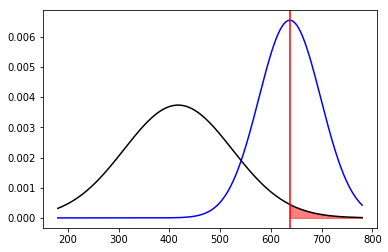

In [157]:
a = df[~df.Legendary]["Total"]
b = df[df.Legendary]["Total"]
display_pvalue_hyp_test(a,b)

Hypothesis: proportion of fire pokemon is higher in generation 4 than 2

In [132]:
subset = df[(df.Generation == 2) | (df.Generation == 4)].copy()
subset["is_fire"] = (subset["Type 1"] == "Fire") | (subset["Type 2"] == "Fire")
print(subset.groupby("Generation")["is_fire"].mean())
print(subset.groupby("Generation")["is_fire"].std())

Generation
2    0.103774
4    0.049587
Name: is_fire, dtype: float64
Generation
2    0.306415
4    0.217992
Name: is_fire, dtype: float64


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


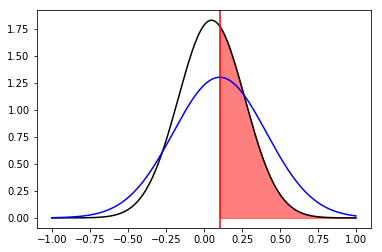

In [133]:
from matplotlib import mlab

x = np.arange(-1,1, 1/1000)
results = [*zip(subset.groupby("Generation")["is_fire"].mean(), subset.groupby("Generation")["is_fire"].std())]
# CI = np.arange(-2, 2, 1/100)

H0 = mlab.normpdf(x, results[1][0], results[1][1])
H1 = mlab.normpdf(x, results[0][0], results[0][1])

plt.plot(x, H0, color="k")
plt.plot(x, H1, color="b")

critical_value = results[0][0]
pvalue_range = np.arange(critical_value, 1, 1/1000)

plt.axvline(critical_value, color="r")
plt.fill_between(pvalue_range, mlab.normpdf(pvalue_range, results[1][0], results[1][1]), color="red", alpha=0.5)

In [44]:
from scipy import stats

def get_pvalue(p1, p2, n1, n2):
    lift = - abs(p2 - p1)
    se1 = (p1 * (1 - p1))/n1
    se2 = (p2 * (1 - p2))/n2
    se = (se1 + se2)**0.5
    
    p_value = 2 * stats.norm.cdf(lift, loc=0, scale = se)
    
    return(p_value)

In [43]:
get_pvalue(0.103774, 0.049587, subset[subset.Generation == 2].shape[0], subset[subset.Generation == 4].shape[0])

1.8720877838746492

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


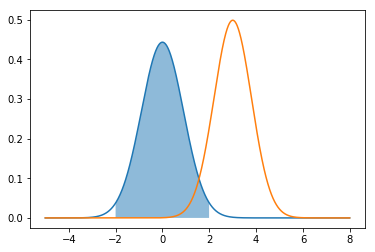

In [73]:
from matplotlib import mlab

x = np.arange(-5,8, 1/100)
CI = np.arange(-2, 2, 1/100)

plt.plot(x, mlab.normpdf(x, 0 , 0.9))
plt.fill_between(CI, mlab.normpdf(CI, 0 , 0.9), alpha=0.5)
plt.plot(x, mlab.normpdf(x, 3, 0.8))